In [1]:
# 웹 스크래핑 : 자동화된 SW(=bot)를 사용하여 웹 사이트의 콘텐츠와 데이터를 추출하는 것
# - 자동 웹 네비게이션을 통한 추출

# 일반적인 웹 스크래핑 절차
# - 대상 웹 사이트 식별
# - 데이터 추출하고자 하는 웹페이지들의 URL 수집
# - URL에 HTML 문서 요청
# - 반환된 HTML 문서를 검사 및 원하는 데이터 추출
# - JSON 또는 .csv파일 또는 기타 구조화된 형식으로 데이터를 저장

In [2]:
# 웹 스크래핑의 사용 목적
# - 시장 조사 (ex. 가격 비교)
# - 빅데이터/AI를 위한 학습용 데이터 수집
# - 비즈니스 관련 데이터베이스 구축
# - pdf 출판물로부터 정보를 추출

# 위법 이슈 : 기본적으로 웹 스크래핑은 웹사이트의 콘텐츠를 복제하는 행위
# - OWASP에서는 웹 스크래핑을 자동화된 위협 요소로 정의

# 합법적 사용 예
# 검색 엔진 크롤러
# 온라인 포럼 및 소셜 미디어 데이터 수집 (시장 조사 목적)
# 온라인 소매업체에서 가격 및 제품 설명 수집(가격 비교 웹사이트)

In [4]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="메타버스 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="'메타버스'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="'메타버스'의 네이버 통합검색 결과입니다."> <title>메타버스 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_211202.css"> <link rel="stylesheet" type="text/css" href=
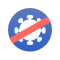
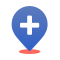
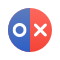
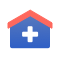

In [1]:
"""
Exercise 1: Search '메타버스' news on Naver
"""
# HTTP Request
import requests

url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%A9%94%ED%83%80%EB%B2%84%EC%8A%A4'
res = requests.get(url)  # HTTP GET Request

html_doc = res.text      # get texts from the HTML response result

print(html_doc)

<!DOCTYPE html>
<html lang="ko">
 <head>
  <meta charset="utf-8"/>
  <meta content="always" name="referrer"/>
  <meta content="telephone=no,address=no,email=no" name="format-detection"/>
  <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/>
  <meta content="메타버스 : 네이버 통합검색" property="og:title">
   <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/>
   <meta content="'메타버스'의 네이버 통합검색 결과입니다." property="og:description"/>
   <meta content="'메타버스'의 네이버 통합검색 결과입니다." lang="ko" name="description"/>
   <title>
    메타버스 : 네이버 통합검색
   </title>
   <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/>
   <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml">
    <link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_211202.css" rel="stylesheet" type="text/css"
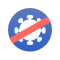
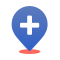
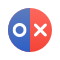
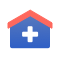

In [2]:
"""
Use BeautifulSoup Parser
"""

from bs4 import BeautifulSoup
# html, xml, lxml,
# Create a parser
soup = BeautifulSoup(html_doc, 'html.parser')
print(soup.prettify())  # structuring the tags

[<a href="#lnb"><span>메뉴 영역으로 바로가기</span></a>,
 <a href="#content"><span>본문 영역으로 바로가기</span></a>,
 <a class="link" href="https://www.naver.com" onclick="return goOtherCR(this, 'a=sta.naver&amp;r=&amp;i=&amp;u='+urlencode(this.href));"><i class="spnew ico_logo">NAVER</i></a>,
 <a aria-pressed="false" class="bt_setkr" href="#" id="ke_kbd_btn" onclick="return tCR('a=sch.ime');" role="button"><i class="spnew ico_keyboard">한글 입력기</i></a>,
 <a aria-pressed="false" class="bt_atcp _btn_arw" data-atcmp-element="" href="#" id="nautocomplete" role="button"><i class="spnew ico_arrow">자동완성 레이어</i></a>,
 <a aria-pressed="false" class="item _delAll" href="#" role="button">전체삭제</a>,
 <a class="kwd" href="#"> <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span> </a>,
 <a aria-pressed="false" class="bt_item _del" href="#" role="button"><i class="imsc ico_del">삭제</i></a>,
 <a class="kwd_help" href="https://help.naver.com/support/alias/search/word/
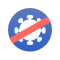
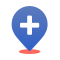
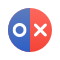
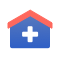

In [3]:
# Search all the <a> tags

soup.find_all('a')

In [4]:
# Extract news information

news = soup.find_all("a", {"class":"news_tit"})
print(news)

[<a class="news_tit" href="http://www.newsis.com/view/?id=NISX20211206_0001677543&amp;cID=10804&amp;pID=14000" onclick="return goOtherCR(this, 'a=nws_all*h.tit&amp;r=1&amp;i=88000127_000000000000000010873575&amp;g=003.0010873575&amp;u='+urlencode(this.href));" target="_blank" title="남양주시, 메타버스와 행정 접목 '글로벌 ESG 메타시티 서밋' 개최">남양주시, <mark>메타버스</mark>와 행정 접목 '글로벌 ESG 메타시티 서밋' 개최</a>, <a class="news_tit" href="http://www.newspim.com/news/view/20211206000917" onclick="return goOtherCR(this, 'a=nws_all*b.tit&amp;r=4&amp;i=88000394_000000000000000001963909&amp;g=5002.0001963909&amp;u='+urlencode(this.href));" target="_blank" title="김해시 스마트도시 메타버스 서비스 모델 발굴 나서">김해시 스마트도시 <mark>메타버스</mark> 서비스 모델 발굴 나서</a>, <a class="news_tit" href="http://www.fnnews.com/news/202112061441225672" onclick="return goOtherCR(this, 'a=nws_all*h.tit&amp;r=7&amp;i=880000FF_000000000000000004751010&amp;g=014.0004751010&amp;u='+urlencode(this.href));" target="_blank" title="중앙대, 학생 주도 메타버스 캠퍼스 오픈">중앙대, 학생 주도 <mark>메타버스</ma

In [5]:
# First news
news[0]

<a class="news_tit" href="http://www.newsis.com/view/?id=NISX20211206_0001677543&amp;cID=10804&amp;pID=14000" onclick="return goOtherCR(this, 'a=nws_all*h.tit&amp;r=1&amp;i=88000127_000000000000000010873575&amp;g=003.0010873575&amp;u='+urlencode(this.href));" target="_blank" title="남양주시, 메타버스와 행정 접목 '글로벌 ESG 메타시티 서밋' 개최">남양주시, <mark>메타버스</mark>와 행정 접목 '글로벌 ESG 메타시티 서밋' 개최</a>

In [6]:
# Get a url of the first news
news[0].get('href')

'http://www.newsis.com/view/?id=NISX20211206_0001677543&cID=10804&pID=14000'

In [7]:
# Get a title
news[0].get('title')

"남양주시, 메타버스와 행정 접목 '글로벌 ESG 메타시티 서밋' 개최"

In [8]:
len(news)

4

In [9]:
for i in range(len(news)):
    print(news[i].get('title'))

남양주시, 메타버스와 행정 접목 '글로벌 ESG 메타시티 서밋' 개최
김해시 스마트도시 메타버스 서비스 모델 발굴 나서
중앙대, 학생 주도 메타버스 캠퍼스 오픈
우리은행, '소상공인 금융지원' 위한 메타버스 지점 오픈


In [10]:
"""
Exercise 2: Investing.com
"""
import requests
url = 'https://www.investing.com/equities/tesla-motors'

res = requests.get(url)
html_doc = res.text

In [11]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')
print(soup.prettify())  # structuring the tags

<!DOCTYPE html>
<html class="html" dir="ltr" lang="en">
 <head>
  <link as="script" href="//securepubads.g.doubleclick.net/tag/js/gpt.js" rel="preload"/>
  <link href="//i-invdn-com.investing.com" rel="dns-prefetch"/>
  <link href="//d1-invdn-com.investing.com" rel="dns-prefetch"/>
  <link href="//securepubads.g.doubleclick.net" rel="dns-prefetch"/>
  <link href="//www.googletagmanager.com" rel="dns-prefetch"/>
  <link href="//i-invdn-com.investing.com" rel="preconnect"/>
  <link href="//securepubads.g.doubleclick.net" rel="preconnect"/>
  <link href="//live.sekindo.com" rel="preconnect"/>
  <link href="//www.google-analytics.com" rel="preconnect"/>
  <link href="//c.amazon-adsystem.com" rel="preconnect"/>
  <link href="//connect.facebook.net" rel="preconnect"/>
  <link href="//tpc.googlesyndication.com" rel="preconnect"/>
  <link href="//lh5.googleusercontent.com" rel="preconnect"/>
  <link href="//d1-invdn-com.investing.com" rel="preconnect"/>
  <link href="//www.googletagmanager.com

In [12]:
keys = soup.find_all('dt')
print(keys)

[<dt>Prev. Close</dt>, <dt>Day's Range</dt>, <dt>Revenue</dt>, <dt>Open</dt>, <dt>52 wk Range</dt>, <dt>EPS</dt>, <dt>Volume</dt>, <dt>Market Cap</dt>, <dt>Dividend (Yield)</dt>, <dt>Average Vol. (3m)</dt>, <dt>P/E Ratio</dt>, <dt>Beta</dt>, <dt>1-Year Change</dt>, <dt>Shares Outstanding</dt>, <dt>Next Earnings Date</dt>]


In [13]:
vals = soup.find_all('span', {'class': 'key-info_dd-numeric__2cYjc'})
print(vals)

[<span class="key-info_dd-numeric__2cYjc"><span>1,084.6</span><span></span></span>, <span class="key-info_dd-numeric__2cYjc"><span>1,000.21</span><span></span></span>, <span class="key-info_dd-numeric__2cYjc"><span>1,090.58</span><span></span></span>, <span class="key-info_dd-numeric__2cYjc"><span>46.85</span><span>B</span></span>, <span class="key-info_dd-numeric__2cYjc"><span>1,084.79</span><span></span></span>, <span class="key-info_dd-numeric__2cYjc"><span>539.49</span><span></span></span>, <span class="key-info_dd-numeric__2cYjc"><span>1,243.49</span><span></span></span>, <span class="key-info_dd-numeric__2cYjc"><span>3.08</span><span></span></span>, <span class="key-info_dd-numeric__2cYjc"><span>30,125,718</span><span></span></span>, <span class="key-info_dd-numeric__2cYjc"><span>1.02</span><span>T</span></span>, <span class="key-info_dd-numeric__2cYjc"><span>25,175,586</span><span></span></span>, <span class="key-info_dd-numeric__2cYjc"><span>329.36</span><span></span></span>, <

In [14]:
for i in range(len(vals)):
    print(keys[i].get_text(), '=', vals[i].get_text())

Prev. Close = 1,084.6
Day's Range = 1,000.21
Revenue = 1,090.58
Open = 46.85B
52 wk Range = 1,084.79
EPS = 539.49
Volume = 1,243.49
Market Cap = 3.08
Dividend (Yield) = 30,125,718
Average Vol. (3m) = 1.02T
P/E Ratio = 25,175,586
Beta = 329.36
1-Year Change = 2.05
Shares Outstanding = 69.43%
Next Earnings Date = 1,006,419,424
